# Description/Problem Statement
## Context:
AllLife Bank aims to optimize its credit card customer base in the upcoming financial year. To achieve this goal, the bank's Marketing and Operations teams have identified two key areas for improvement. The Marketing team plans to implement personalized campaigns to attract new customers and increase upselling to existing customers. Meanwhile, the Operations team intends to enhance the service delivery model to address customer concerns more efficiently. Both teams have reached out to the Data Science team for assistance in achieving these objective

## Objective:
This project aims to identify customer segments within AllLife Bank's existing customer base using clustering algorithms. By analyzing spending patterns and past interactions, the project will provide recommendations to enhance marketing and service strategies for each segment, leading to improved customer satisfaction and business growth.

## Questions 
Can we identify distinct customer segments within AllLife Bank's credit card customer base?

What are the key demographic, transactional, and behavioral attributes that differentiate these customer segments?

How can personalized marketing campaigns be developed to target and attract new customers?

How can existing customers be effectively upsold to increase their engagement and usage of credit card services?

What are the main pain points and areas of improvement in the current customer support services?

How can the service delivery model be upgraded to resolve customer queries faster and enhance customer satisfaction?

## Data Background:
The provided dataset contains information about customers from a bank, including their financial attributes such as credit limit and the number of credit cards they possess. It also includes data about the different channels through which customers have reached out to the bank for queries, including in-person visits, online interactions, and contact through the call center. This dataset will be utilized to analyze customer behavior, identify patterns, and make data-driven decisions to enhance marketing strategies and improve customer service at the bank.

## Data Dictionary
Sl_No: Primary key of the records

Customer Key: Customer identification number

Average Credit Limit: Average credit limit of each customer for all credit cards

Total credit cards: Total number of credit cards possessed by the customer

Total visits bank: Total number of visits that customer made (yearly) personally to the bank

Total visits online: Total number of visits or online logins made by the customer (yearly)

Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Import necessary libraries

In [56]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for efficient iteration and combination of elements
import itertools

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means, DBSCAN clustering and compute silhouette scores
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# to compute distances
from scipy.spatial.distance import cdist

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [3]:
# Load Dataset
df = pd.read_excel("Credit+Card+Customer+Data.xlsx")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
# check dimension of dataset
df.shape

(660, 7)

In [5]:
# create a copy of the original data
data = df.copy()

In [6]:
# Check duplicates
data.duplicated().sum()

0

In [7]:
#check the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


The output represents a DataFrame with 660 rows and 7 columns, where each column contains integer values.

In [8]:
# check missing value
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

The output show that there is no missing value in the dataset

In [9]:
# dropping the serial no. column and customer key as it does not provide any information
data.drop(["Sl_No","Customer Key"], axis = 1, inplace = True)

In [10]:
# Check the unique values

data.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [11]:
# descriptive computational analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


This output provides a summary of statistical measures for each column in the dataset, giving an understanding of the central tendency, spread, and range of values in each column.

- Avg_Credit_Limit: This column has 660 non-null values. The average credit limit is approximately 34,574.24, with a standard deviation of 37,625.49. The minimum credit limit is 3,000, and the maximum credit limit is 200,000.
- Total_Credit_Cards: This column has 660 non-null values. On average, customers have approximately 4.71 credit cards, with a standard deviation of 2.17. The minimum number of credit cards is 1, and the maximum number is 10.
- Total_visits_bank: This column has 660 non-null values. On average, customers visit the bank approximately 2.40 times, with a standard deviation of 1.63. The minimum number of visits to the bank is 0, and the maximum number is 5.
- Total_visits_online: This column has 660 non-null values. On average, customers visit online platforms approximately 2.61 times, with a standard deviation of 2.94. The minimum number of online visits is 0, and the maximum number is 15.
- Total_calls_made: This column has 660 non-null values. On average, customers make approximately 3.58 calls, with a standard deviation of 2.87. The minimum number of calls made is 0, and the maximum number is 10.

## Exploratory Data Analysis


In [12]:
# select the numerical features as a list of numerical columns
num = data.select_dtypes(include= np.number).columns.tolist()

num

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [15]:
# Let's check for correlations
num_data = data[num]

cor = num_data.corr()
cor

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


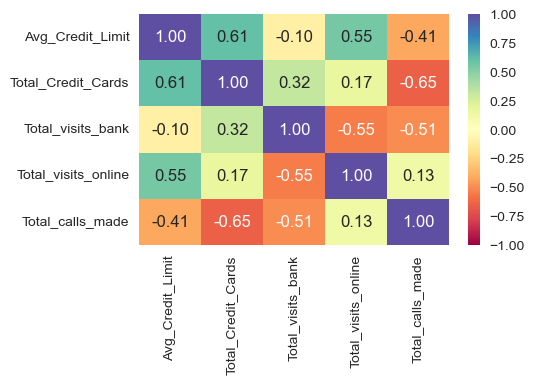

In [16]:
plt.figure(figsize=(5, 3))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = "Spectral", annot=True, fmt=".2f")
plt.show()


The heatmap plot reveals several correlations in the dataset. Here's a summary in a few words:

- Average Credit Limit and Total Credit Cards have a moderate positive correlation of 0.61, suggesting that as the average credit limit increases, the total number of credit cards tends to increase.

- Total Bank Visits has a negative correlation with Total Visits Online (-0.55) and Total Calls Made (-0.51), indicating that as the number of bank visits increases, the number of online visits and calls made tends to decrease.

- Total Calls Made has a negative correlation with Total Credit Cards (-0.65), implying that as the number of credit cards increases, the number of calls made tends to decrease.

- Average Credit Limit has a moderate negative correlation with Total Calls Made (-0.41), indicating that as the average credit limit increases, the number of calls made tends to decrease.

- Average Credit Limit and Total Visits Bank have a weak negative correlation (-0.10), suggesting that there is little or no linear relationship between the average credit limit and the number of visits to the bank.

Overall, the heatmap provides insights into the relationships between variables, indicating whether they are positively or negatively correlated and the strength of those correlations.

## Treating Outliers

In [20]:
# Function to treat outliers in numerical variables using IQR method
def treat_outliers(data, col):
    """
    Treat outliers in numerical variables
    data: DataFrame
    col: str, name of the numerical variable
    """
    Q1 = data[col].quantile(0.25) # first quartile
    Q3 = data[col].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_whisker = Q1 - (1.5 * IQR) # calculate lower whisker
    upper_whisker = Q3 + (1.5 * IQR) # calculate upper whisker
    data[col] = np.clip(data[col], lower_whisker, upper_whisker) # clip the values of the variable between the lower and upper whisker
    return data

In [21]:
# Function to treat outliers in all numerical variables of a DataFrame
def treat_outliers_all(data, col_list):
    """
    Treat outliers in all numerical variables of a DataFrame
    df: DataFrame
    col_list: list of str, names of the numerical variables
    """
    for c in col_list:
        data = treat_outliers(data, c)
    return data

In [22]:
data = treat_outliers_all(data, num_data)

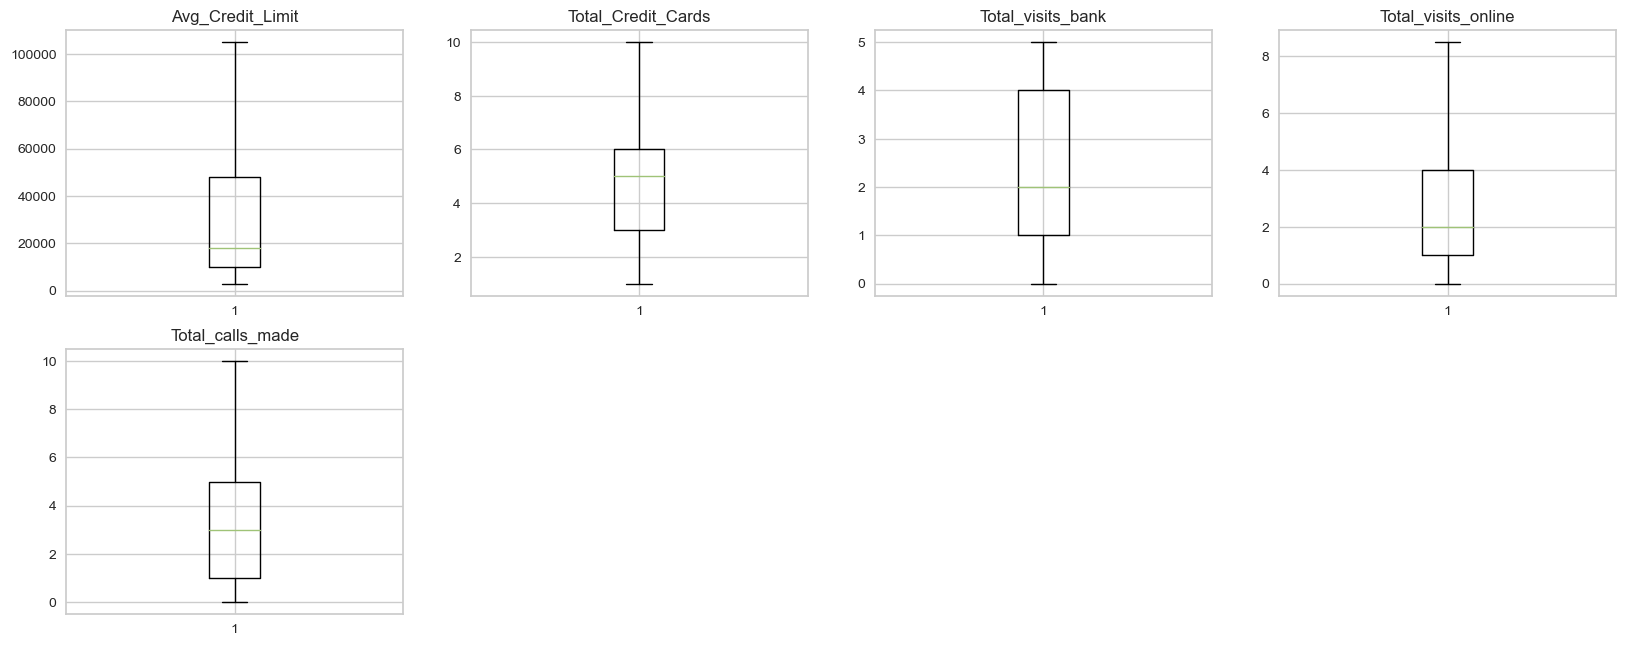

In [24]:
plt.figure(figsize = (20, 20))

for i, variable in enumerate (num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.title(variable)

plt.show()

## KMeans Clustering

In [25]:
# scaling the dataset before clustering

scaler = StandardScaler()
num_data_sd = scaler.fit_transform(num_data)

In [26]:
# Perform k-means clustering
kmeans = KMeans(n_init=10, random_state=0)

kmeans.fit(num_data_sd)

KMeans(random_state=0)

In [27]:
kmeans.inertia_

563.5023751996688

In [28]:
y_pred = kmeans.predict(num_data_sd)

y_pred

array([3, 6, 3, 5, 2, 6, 7, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6, 0, 0,
       0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 6, 0, 6, 0, 6, 0, 6, 6, 6, 0, 0, 0,
       0, 6, 0, 0, 6, 0, 6, 0, 6, 6, 6, 0, 0, 6, 6, 6, 0, 6, 0, 0, 6, 0,
       0, 0, 6, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0,
       6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 6, 0, 6, 6, 0, 0, 0, 6,
       0, 6, 6, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0,
       0, 6, 0, 0, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 0, 0,
       6, 0, 0, 6, 6, 0, 6, 0, 0, 6, 6, 6, 0, 0, 6, 0, 6, 0, 0, 6, 0, 0,
       0, 6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 6, 0, 6, 6, 0,
       0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 6, 0, 0, 0, 0, 6,
       6, 0, 6, 6, 6, 0, 6, 6, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 4,
       5, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4,
       4, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,

In [29]:
silhouette_score(num_data_sd, y_pred)

0.2283708545108481

With 8 clusters, Silhouette score is 0.23

## Choose optimal number of clusters

C:\Users\Rebirthlogo\OneDrive\Documents\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9907383936093271
Number of Clusters: 6 	Average Distortion: 0.9429789712808515
Number of Clusters: 7 	Average Distortion: 0.9093703386475
Number of Clusters: 8 	Average Distortion: 0.8833822238634439


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

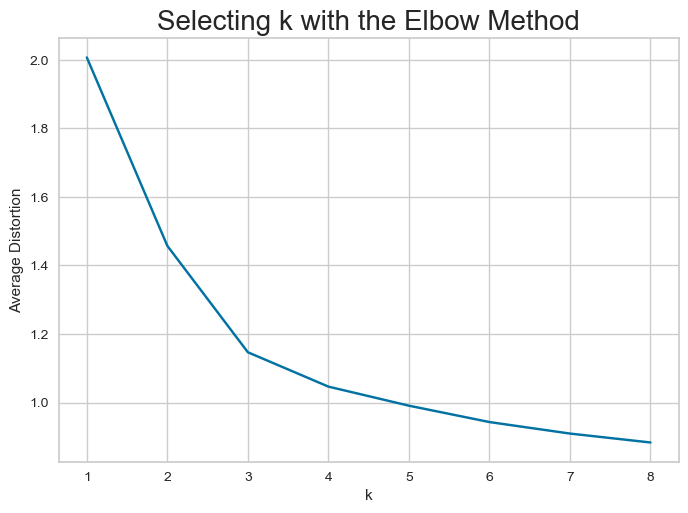

In [30]:
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k, n_init=10)  # Initialize KMeans
    model.fit(num_data_sd)  # Fit kMeans on the scaled data
    prediction = model.predict(num_data_sd)  # Predict the model on the scaled data
    distortion = (
        sum(np.min(cdist(num_data_sd, model.cluster_centers_, "euclidean"), axis=1))
        / num_data_sd.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

We can pick between 2 to 3 groups looking at the elbow curve. We will look at Silhouette score to have a better decision

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2726898791817692
For n_clusters = 6, silhouette score is 0.2555645280295032
For n_clusters = 7, silhouette score is 0.2482713393360752
For n_clusters = 8, silhouette score is 0.22838375845051093
For n_clusters = 9, silhouette score is 0.2189915362084084


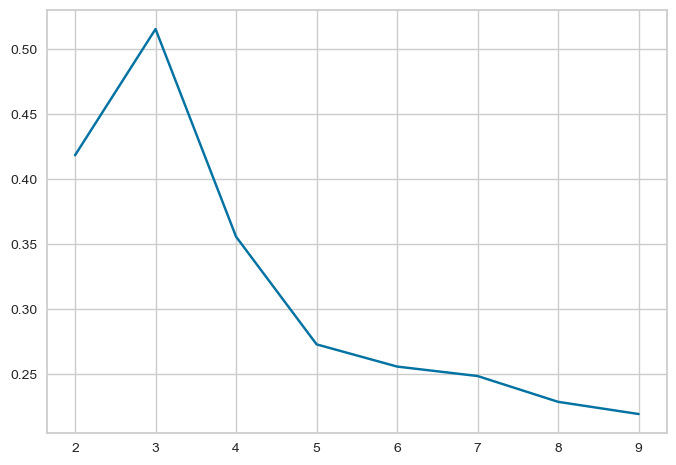

In [32]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((num_data_sd))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(num_data_sd, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

The plot above show that 3 is the best

## Applying KMeans clustering for k=3

In [33]:
kmeans1 = KMeans(n_clusters=3, random_state=0, n_init= 10)
kmeans1.fit(num_data_sd)

KMeans(n_clusters=3, random_state=0)

In [34]:
kmeans1.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
# adding kmeans cluster labels to the original dataframe
data["Kmeans_clusters"] = kmeans1.labels_

In [38]:
#checking colums
data.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Kmeans_clusters'],
      dtype='object')

## Visualizing Groups

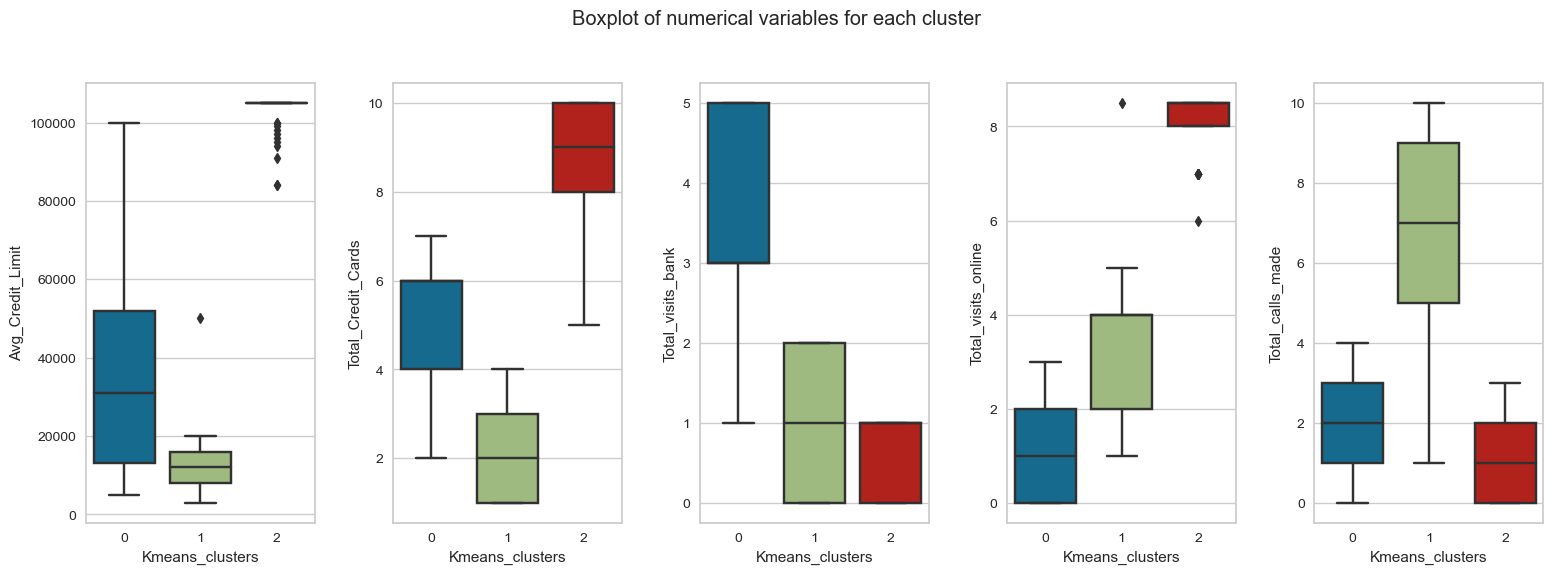

In [39]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")

counter = 0
for ii, ax in enumerate(axes):
    sns.boxplot(ax=ax, y=data[num[counter]], x=data["Kmeans_clusters"])
    counter += 1

fig.tight_layout(pad=2.0)

- Cluster 0: This cluster consists of customers with a moderate average credit limit and a moderate number of credit cards. They frequently visit the bank but have the least online visits and make moderate calls to the bank. To enhance their customer experience, it is recommended to encourage their interaction with the Relationship Manager or Branch Manager during their bank visits. Additionally, promoting online services to them could be beneficial.

- Cluster 1: This cluster represents customers with the lowest average credit limit, the fewest credit cards, moderate bank visits, moderate online interactions, and the highest number of calls. Customer engagement strategies should focus on addressing their specific needs, given their limited credit limit and credit cards. Providing personalized assistance and support, both at the bank and through online channels, can help improve their overall experience.

- Cluster 2: Customers in this cluster have exceptionally high average credit scores, a larger number of credit cards, and the highest level of online interactions. However, they have the least number of total visits to the bank and make fewer calls. To optimize their experience, it is important to maintain their satisfaction with the online services they heavily rely on. Efforts can be made to further enhance their online experience and ensure they feel valued despite their infrequent physical visits to the bank.

In [41]:
data.query("Kmeans_clusters == 0")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters
0,100000.0,2,1,1.0,0,0
2,50000.0,7,1,3.0,4,0
3,30000.0,5,1,1.0,4,0
228,10000.0,7,2,0.0,0,0
229,8000.0,7,2,1.0,4,0
...,...,...,...,...,...,...
607,34000.0,6,3,1.0,0,0
608,47000.0,4,4,1.0,0,0
609,38000.0,4,3,2.0,0,0
610,39000.0,7,2,1.0,0,0


In [42]:
data.query("Kmeans_clusters == 1")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters
1,50000.0,3,0,8.5,9,1
5,20000.0,3,0,1.0,8,1
7,15000.0,3,0,1.0,1,1
8,5000.0,2,0,2.0,2,1
9,3000.0,4,0,1.0,7,1
...,...,...,...,...,...,...
224,12000.0,4,1,5.0,9,1
225,16000.0,4,1,2.0,5,1
226,8000.0,1,2,4.0,8,1
227,8000.0,2,2,3.0,8,1


In [40]:
data.query("Kmeans_clusters == 2")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters
4,100000.0,6,0,8.5,3,2
6,100000.0,5,0,8.5,2,2
612,105000.0,9,1,8.5,1,2
613,94000.0,9,1,8.5,0,2
614,105000.0,8,1,7.0,1,2
615,105000.0,9,1,8.5,1,2
616,96000.0,10,1,8.5,2,2
617,105000.0,8,0,8.5,0,2
618,105000.0,7,0,8.5,2,2
619,105000.0,7,0,8.5,0,2


## DBSCAN Clustering

In [43]:
# create instance of DBSCAN
dbscan = DBSCAN()


# fit and predict the labels
db_labels = dbscan.fit_predict(num_data_sd)

In [44]:
# check the labels
np.unique(db_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [45]:
#try values of eps btn 0.1 and 1; minPts btn 2 and 10

eps = np.linspace(0.1, 1, 10)

minPts = np.arange(2, 10)

In [46]:
# create a tuple of eps and MinPts using product method of itertools
hyper_list= list(itertools.product(eps, minPts))

## Silhouette score

In [48]:
for eps, minPts in hyper_list:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(num_data_sd)
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        score = silhouette_score(num_data_sd, labels)
        print(f"eps: {eps}; minPts: {minPts}; num_labels: {len(unique_labels)}; score: {score}")

eps: 0.1; minPts: 2; num_labels: 59; score: -0.3792847005046285
eps: 0.1; minPts: 3; num_labels: 6; score: -0.4538623399170749
eps: 0.1; minPts: 4; num_labels: 3; score: -0.21755863126572988
eps: 0.2; minPts: 2; num_labels: 89; score: -0.24134194807651826
eps: 0.2; minPts: 3; num_labels: 20; score: -0.47374460800956625
eps: 0.2; minPts: 4; num_labels: 7; score: -0.39937304928535683
eps: 0.30000000000000004; minPts: 2; num_labels: 111; score: -0.18272359988415532
eps: 0.30000000000000004; minPts: 3; num_labels: 29; score: -0.4491418233307505
eps: 0.30000000000000004; minPts: 4; num_labels: 8; score: -0.4237471778396673
eps: 0.4; minPts: 2; num_labels: 115; score: 0.032916960495707005
eps: 0.4; minPts: 3; num_labels: 70; score: -0.06358916972505173
eps: 0.4; minPts: 4; num_labels: 45; score: -0.18198171811681166
eps: 0.4; minPts: 5; num_labels: 26; score: -0.3025802261994537
eps: 0.4; minPts: 6; num_labels: 12; score: -0.378803463122143
eps: 0.4; minPts: 7; num_labels: 7; score: -0.38229

## Rebuild the DBSCAN model
Use eps = 1 and minPts = 3

In [49]:
# create instance of DBSCAN
dbscan1 = DBSCAN(eps = 1.0, min_samples = 3)


# fit and predict the labels
db_labels1 = dbscan1.fit_predict(num_data_sd)

In [50]:
# Check the unique values

np.unique(db_labels1)

array([-1,  0,  1], dtype=int64)

In [51]:
# add the dbscan labels to the original data
data["db_labels"] = db_labels1 

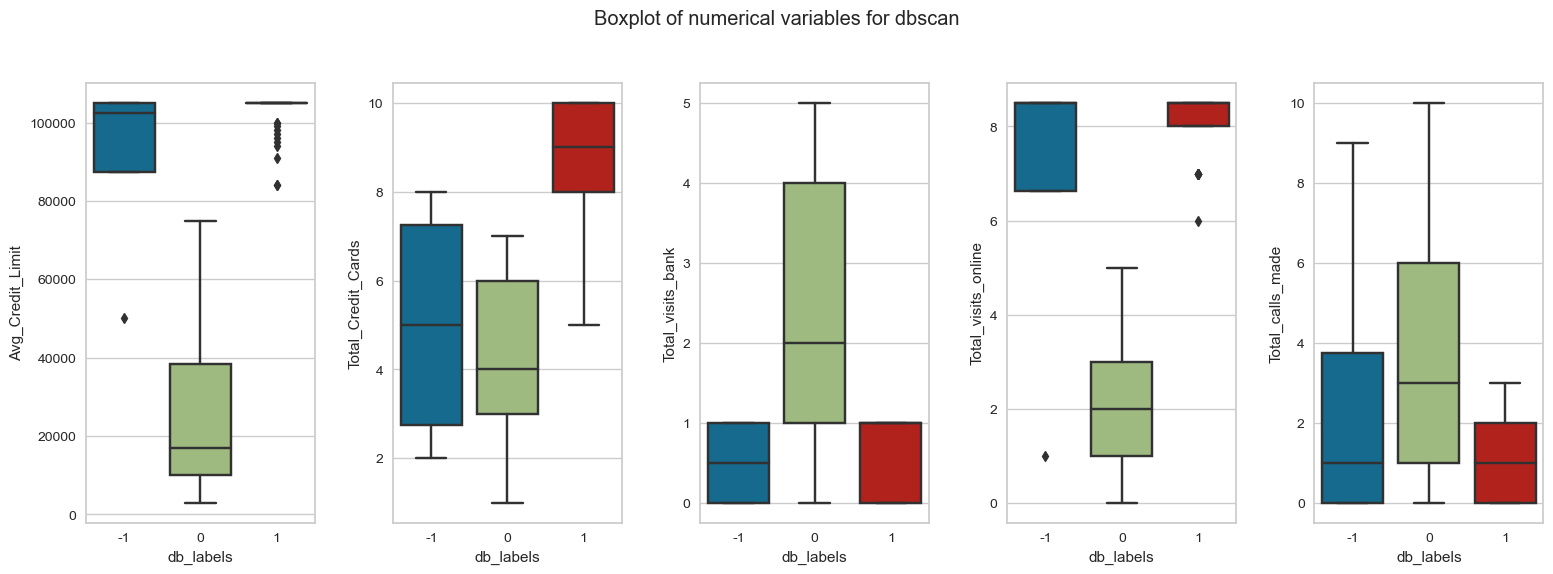

In [52]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for dbscan")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num[counter]], x=data["db_labels"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

- DB_Label -1: This label represents customers with a high average credit score but the fewest total credit cards. They have the least number of visits to the bank but show moderate online interactions and moderate to high calls to the bank. It is important to focus on enhancing their online experience and providing efficient customer service through both online and call channels.

- DB_Label 0: This label corresponds to customers with the lowest average credit score but a moderate number of total credit cards. They tend to visit the bank frequently but have the least online interactions and moderate calls to the bank. Efforts should be made to engage with these customers during their bank visits and provide them with personalized assistance to improve their overall experience.

- DB_Label 1: This label represents customers with an extremely high average credit limit and a high number of total credit cards. They have the fewest total visits to the banks and make the least number of calls to the bank. However, they have the highest total online visits. These customers are considered premium customers, and it is crucial for ALL life Bank to prioritize their needs and satisfaction. They should be targeted for higher profits, and their online user experience should be enhanced with additional features and a clean user interface to effectively manage their credit cards.

In [53]:
data.query("db_labels == -1")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_labels
0,100000.0,2,1,1.0,0,0,-1
1,50000.0,3,0,8.5,9,1,-1
631,105000.0,8,0,8.5,0,2,-1
639,105000.0,7,1,8.5,2,2,-1


Considering there are only four customers in DB_Label -1 with specific characteristics, the bank can take targeted actions to cater to their needs:

Personalized Offers: Analyze the online interactions and call records of these customers to understand their preferences and offer personalized product recommendations, such as tailored credit cards or customized loan options.

Enhanced Online Experience: Improve the bank's digital platforms with a seamless and user-friendly interface, providing quick access to account information, secure messaging for customer support, and personalized financial management tools.

Targeted Communication: Train customer service representatives to efficiently handle customer inquiries and implement targeted communication strategies, reaching out to these customers with relevant information, exclusive offers, updates, and personalized advice.

Credit Limit Increase: Evaluate their creditworthiness and consider offering credit limit increases on existing cards to strengthen loyalty and provide financial flexibility.

Feedback and Surveys: Engage with these customers to gather feedback, conduct surveys, and address their needs and expectations to improve the bank's services.

By treating these customers as valuable individuals and providing personalized attention, the bank can enhance their banking experience and strengthen their relationship with the institution.

In [54]:
data.query('db_labels == 1')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_labels
4,100000.0,6,0,8.5,3,2,1
6,100000.0,5,0,8.5,2,2,1
612,105000.0,9,1,8.5,1,2,1
613,94000.0,9,1,8.5,0,2,1
614,105000.0,8,1,7.0,1,2,1
615,105000.0,9,1,8.5,1,2,1
616,96000.0,10,1,8.5,2,2,1
617,105000.0,8,0,8.5,0,2,1
618,105000.0,7,0,8.5,2,2,1
619,105000.0,7,0,8.5,0,2,1


The labeled customers in db_label 1 represent a premium class of customers, and the bank can take several actions to cater to their specific needs and enhance their banking experience. Firstly, personalized relationship management should be prioritized, with dedicated relationship managers assigned to provide tailored assistance and financial solutions.

To leverage their high online engagement, the bank should continuously improve its online banking platform by introducing advanced features, personalized dashboards, and real-time customer support. Exclusive rewards and benefits should be offered to these customers, including higher cashback percentages, access to premium credit cards, discounted or priority services, and exclusive partnerships.

In [55]:
data.query('db_labels == 0')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_labels
2,50000.0,7,1,3.0,4,0,0
3,30000.0,5,1,1.0,4,0,0
5,20000.0,3,0,1.0,8,1,0
7,15000.0,3,0,1.0,1,1,0
8,5000.0,2,0,2.0,2,1,0
...,...,...,...,...,...,...,...
607,34000.0,6,3,1.0,0,0,0
608,47000.0,4,4,1.0,0,0,0
609,38000.0,4,3,2.0,0,0,0
610,39000.0,7,2,1.0,0,0,0


The majority of the bank's customers fall under db_label(0), and to cater to this customer segment, several actions can be taken. Improving the online banking platform is crucial, offering user-friendly features, easy navigation, online transaction capabilities, and personalized recommendations.

Investing in enhancing customer support channels, such as phone support, live chat, or email, will ensure efficient resolution of customer queries and concerns. Offering credit education and management resources, including financial literacy programs and credit counseling services, can help customers improve their credit management skills.

Targeted marketing campaigns and promotions should be created to incentivize customer engagement and loyalty. Improving the user experience through a clean and intuitive user interface for managing credit cards will enhance customer satisfaction and ease of use. Personalized recommendations based on customer data can be utilized to suggest tailored financial products and services.

By implementing these strategies, the bank can enhance customer satisfaction, engagement, and financial management for customers in db_label(0).